In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

# Paths

In [3]:
KAGGLE_DIR = Path('/kaggle')
INPUT_DIR = KAGGLE_DIR / 'input' / 'store-sales-time-series-forecasting'
WORKING_DIR = KAGGLE_DIR / 'working'

# Datasets

In [49]:
holidays_events = pd.read_csv(INPUT_DIR / 'holidays_events.csv', parse_dates=['date'])
oil = pd.read_csv(INPUT_DIR / 'oil.csv', parse_dates=['date'])
# sample_submission = pd.read_csv(INPUT_DIR / 'sample_submission.csv')
stores = pd.read_csv(INPUT_DIR / 'stores.csv')
transactions = pd.read_csv(INPUT_DIR / 'transactions.csv', parse_dates=['date'])
test = pd.read_csv(INPUT_DIR / 'test.csv', parse_dates=['date'])
train = pd.read_csv(INPUT_DIR / 'train.csv', parse_dates=['date'])

# Exploratory Data Analysis

## Train

In [5]:
train.shape

(3000888, 6)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [10]:
train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Density'>

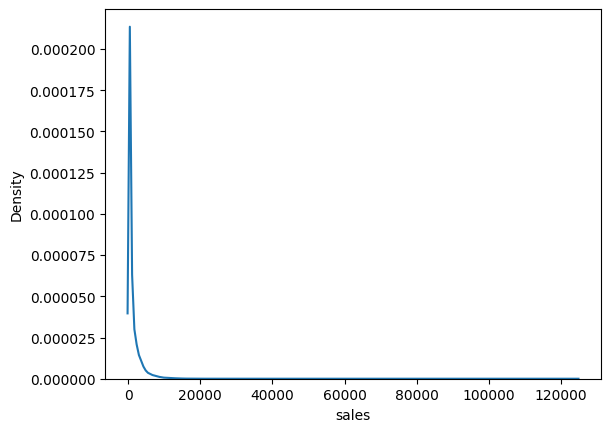

In [11]:
sns.kdeplot(data=train, x='sales')

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Density'>

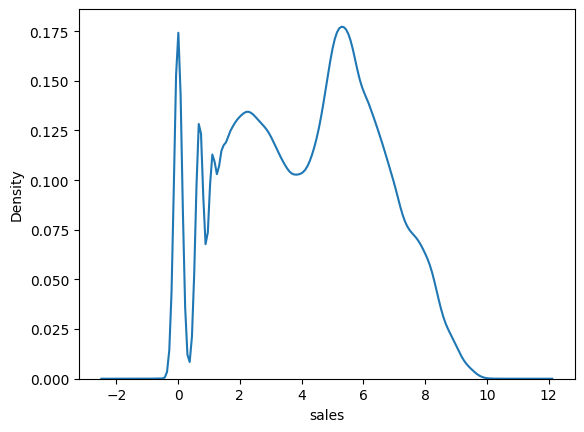

In [12]:
sns.kdeplot(np.log(train['sales']))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='sales'>

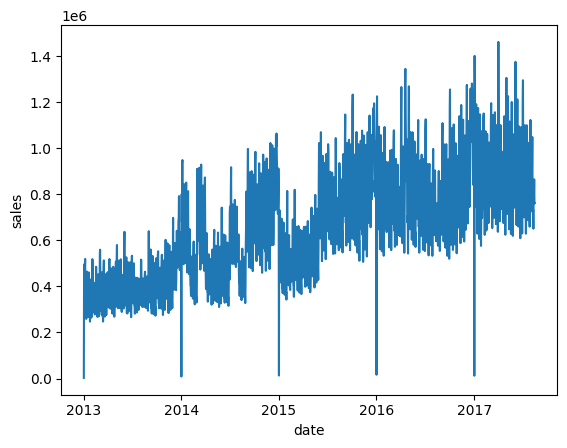

In [53]:
sns.lineplot(train.groupby('date')['sales'].sum())

In [55]:
train.groupby('store_nbr')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
store_nbr,,,,,,,,
1,55572.0,254.534889,596.827146,0.0,1.0,19.0000,166.000000,9065.000
2,55572.0,387.918172,1079.560490,0.0,2.0,23.2170,291.000000,124717.000
3,55572.0,908.405495,2146.185033,0.0,4.0,64.0000,586.000000,21858.000
4,55572.0,340.273886,801.128208,0.0,1.0,19.0000,257.128000,8969.000
5,55572.0,280.580231,652.588149,0.0,1.0,19.0000,237.000000,8216.620
6,55572.0,453.172101,1072.348435,0.0,1.0,29.0000,356.720000,12878.000
7,55572.0,484.993334,1139.705304,0.0,2.0,27.2425,300.727750,12907.000
8,55572.0,548.734739,1275.423965,0.0,3.0,39.0000,372.236250,13511.000
9,55572.0,475.229271,1269.620655,0.0,1.0,18.0000,396.000000,38422.625


In [13]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

<Axes: xlabel='sales', ylabel='family'>

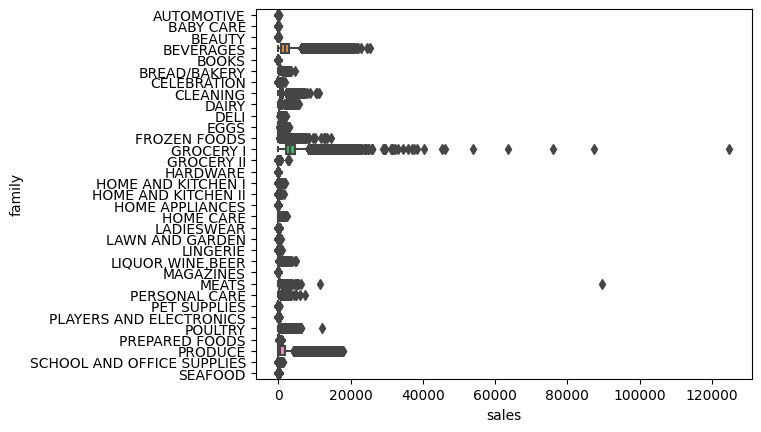

In [14]:
sns.boxplot(data=train, y='family', x='sales')

In [61]:
train.date.min(), train.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

## Holiday events

In [15]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [16]:
holidays_events.shape

(350, 6)

<Axes: xlabel='type', ylabel='count'>

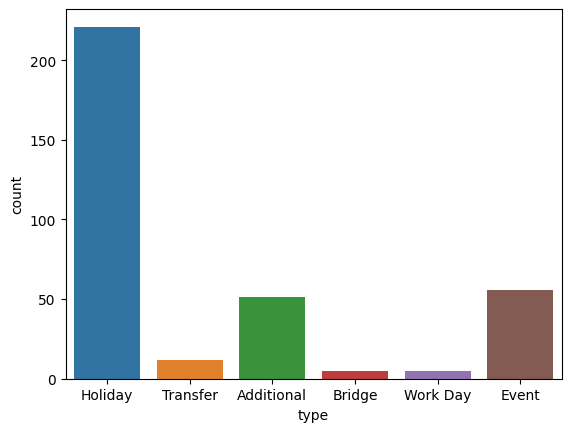

In [17]:
sns.countplot(data=holidays_events, x='type')

<Axes: xlabel='locale', ylabel='count'>

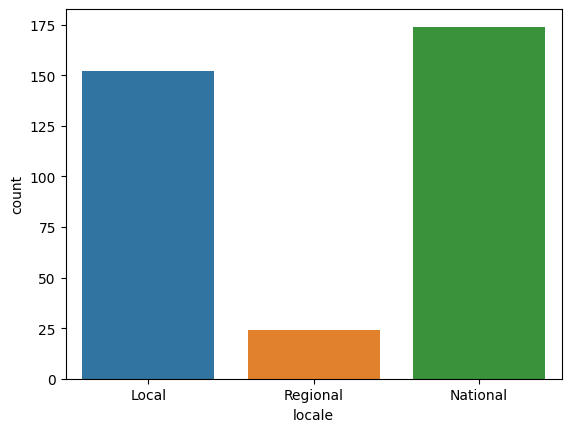

In [18]:
sns.countplot(data=holidays_events, x='locale')

<Axes: xlabel='transferred', ylabel='count'>

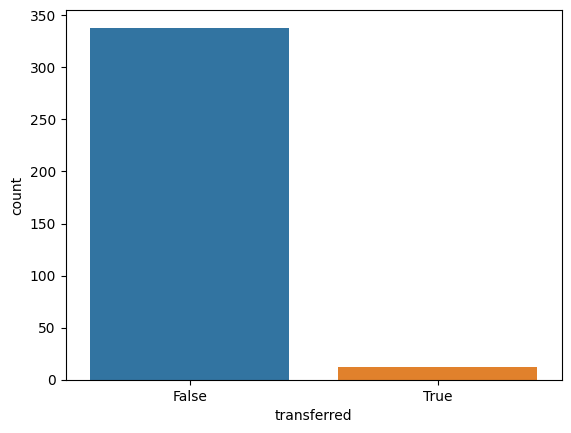

In [19]:
sns.countplot(data=holidays_events, x='transferred')

In [20]:
holidays_events['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [62]:
holidays_events.date.min(), holidays_events.date.max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

## Oil

In [21]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [27]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [24]:
oil.shape

(1218, 2)

In [25]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

<Axes: >

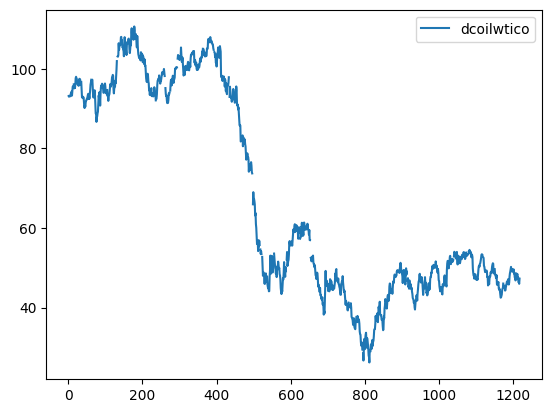

In [22]:
oil.plot()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='dcoilwtico'>

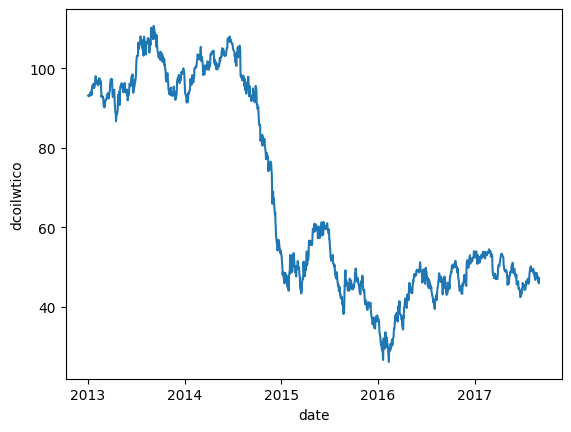

In [32]:
sns.lineplot(data=oil, y='dcoilwtico', x='date')

<Axes: >

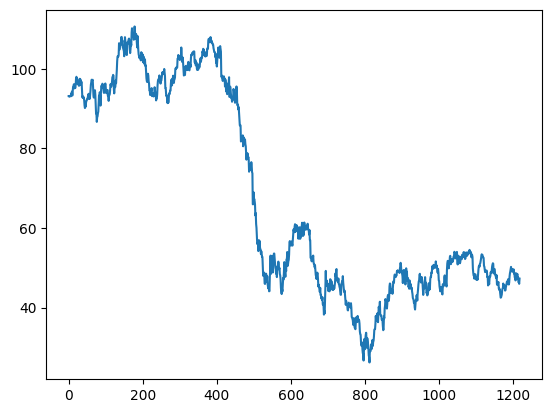

In [37]:
oil['dcoilwtico'].bfill().plot()

In [60]:
oil.date.min(), oil.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

## Stores

In [38]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [39]:
stores.shape

(54, 5)

In [40]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

<Axes: xlabel='count', ylabel='city'>

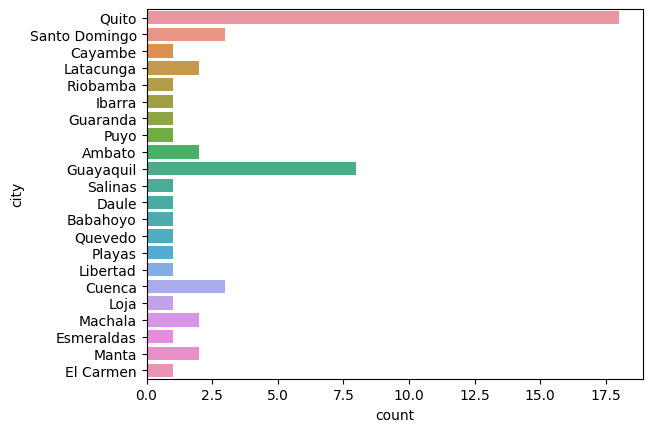

In [42]:
sns.countplot(data=stores, y='city')

<Axes: xlabel='count', ylabel='state'>

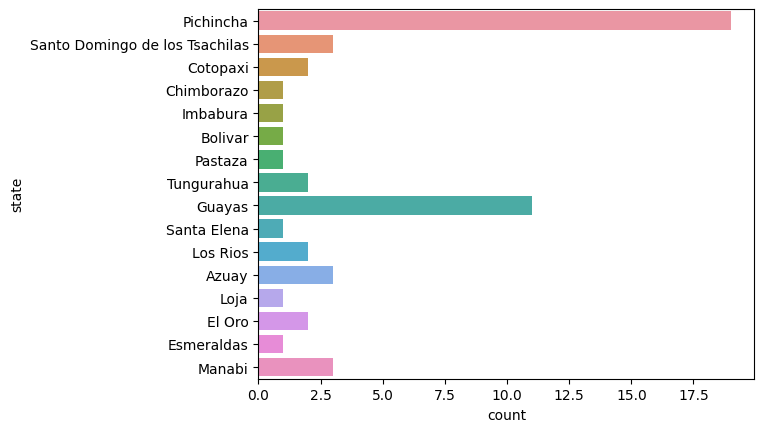

In [43]:
sns.countplot(data=stores, y='state')

<Axes: xlabel='count', ylabel='type'>

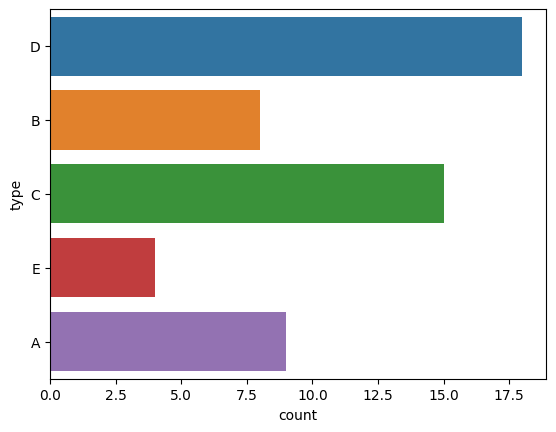

In [44]:
sns.countplot(data=stores, y='type')

<Axes: xlabel='count', ylabel='cluster'>

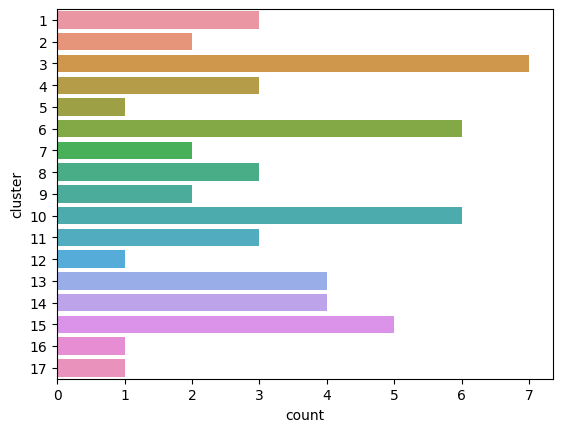

In [45]:
sns.countplot(data=stores, y='cluster')

## Transactions

In [46]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [47]:
transactions.shape

(83488, 3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='transactions'>

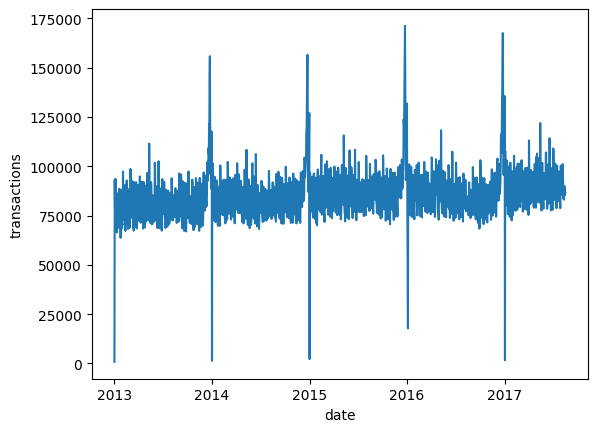

In [52]:
sns.lineplot(transactions.groupby('date')['transactions'].sum())

In [54]:
transactions.groupby('store_nbr')['transactions'].describe()

,count,mean,std,min,25%,50%,75%,max
store_nbr,,,,,,,,
1,1676.0,1523.844272,503.577771,10.0,1325.75,1746.0,1832.00,3023.0
2,1677.0,1920.036374,226.496662,6.0,1795.00,1889.0,2006.00,4060.0
3,1676.0,3201.879475,435.543650,2213.0,2888.75,3100.5,3457.00,6085.0
4,1676.0,1502.987470,228.510746,785.0,1355.00,1455.0,1613.00,3589.0
5,1677.0,1400.045915,225.305906,721.0,1263.00,1379.0,1496.00,3468.0
6,1676.0,1829.293556,299.100268,1380.0,1621.00,1729.0,2037.00,4256.0
7,1675.0,1788.652537,196.749730,1050.0,1684.50,1790.0,1892.00,3023.0
8,1676.0,2767.285800,311.196509,1360.0,2595.00,2740.5,2887.25,5261.0
9,1676.0,2097.948687,325.027157,1462.0,1867.00,2045.0,2271.00,4624.0


In [59]:
transactions.date.min(), transactions.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

## Test

In [56]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [57]:
test.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [58]:
test.date.min(), test.date.max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))